# Validation 07 - Timeseries

In [1]:
%matplotlib inline

In [2]:
import psst

In [3]:
from psst.case import read_matpower
from psst.network import create_network
import pandas as pd

### Validation of case 1

In [4]:
case = read_matpower('../cases/case7.m')

In [5]:
case.load = pd.read_csv('../cases/case7.csv', index_col=0)

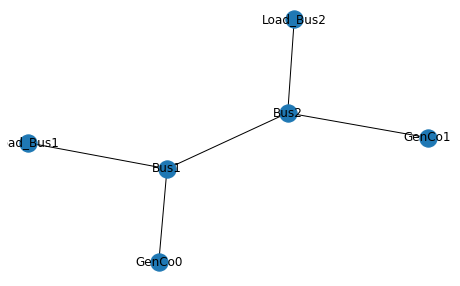

In [6]:
network = create_network(case, prog='neato')
network.draw()

In [7]:
case.load

,Bus1,Bus2
0,0.0,100.0
1,0.0,100.0
2,0.0,100.0
3,0.0,120.0
4,0.0,120.0
5,0.0,120.0
6,0.0,150.0
7,0.0,150.0
8,0.0,150.0
9,0.0,200.0


In [8]:
case.bus

,TYPE,PD,QD,GS,BS,AREA,VM,VA,BASEKV,ZONE,VMAX,VMIN
Bus1,3,0,131.47,0,0,1,1,0,230,1,1.1,0.9
Bus2,2,100,0.00,0,0,1,1,0,230,1,1.1,0.9


In [9]:
case.branch

,F_BUS,T_BUS,BR_R,BR_X,BR_B,RATE_A,RATE_B,RATE_C,TAP,SHIFT,BR_STATUS,ANGMIN,ANGMAX
0,Bus1,Bus2,0.00281,0.0281,0.00712,800,800,800,0,0,1,-360,360


In [10]:
case.gen

,GEN_BUS,PG,QG,QMAX,QMIN,VG,MBASE,GEN_STATUS,PMAX,PMIN,PC1,PC2,QC1MIN,QC1MAX,QC2MIN,QC2MAX,RAMP_AGC,RAMP_10,RAMP_30,RAMP_Q,APF,STARTUP_RAMP,SHUTDOWN_RAMP,MINIMUM_UP_TIME,MINIMUM_DOWN_TIME
GenCo0,Bus1,200,0,30,-30,1,100,1,200,0,0,0,0,0,0,0,0,200,0,0,0,200,200,0,0
GenCo1,Bus2,500,0,30,-30,1,100,1,500,0,0,0,0,0,0,0,0,500,0,0,0,500,500,0,0


In [11]:
case.gencost

,MODEL,STARTUP,SHUTDOWN,NCOST,COST_1,COST_0
GenCo0,2,0,0,2,10,0
GenCo1,2,5000,1000,2,14,2000


In [12]:
import matplotlib.pyplot as plt

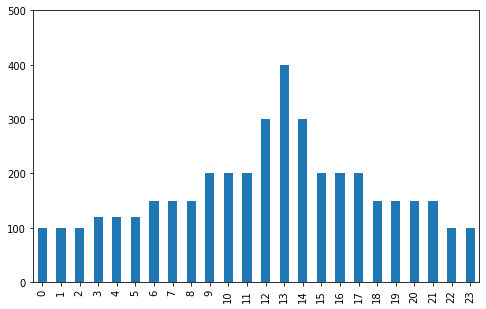

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(8, 5))
ax = axs
case.load['Bus2'].plot.bar(ax=ax)
ax.set_ylim(0, 500);

In [14]:
from psst.model import build_model

In [15]:
model = build_model(case)

Changed model.MinimumPowerOutput to use within=Reals


In [16]:
model

<psst.model.PSSTModel(status=None)>

In [17]:
model.solve(solver='glpk', verbose=True)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --mipgap 0.01 --write /var/folders/z1/nhct2gps3y94tkbwqvvd7y_jw6p1l8/T/tmpudl88cq3.glpk.raw
 --wglp /var/folders/z1/nhct2gps3y94tkbwqvvd7y_jw6p1l8/T/tmpf_m1fhht.glpk.glp
 --cpxlp /var/folders/z1/nhct2gps3y94tkbwqvvd7y_jw6p1l8/T/tmp64sz5vh4.pyomo.lp
Reading problem data from '/var/folders/z1/nhct2gps3y94tkbwqvvd7y_jw6p1l8/T/tmp64sz5vh4.pyomo.lp'...
/var/folders/z1/nhct2gps3y94tkbwqvvd7y_jw6p1l8/T/tmp64sz5vh4.pyomo.lp:5889: warning: lower bound of variable 'UnitOn(GenCo0_0)' redefined
/var/folders/z1/nhct2gps3y94tkbwqvvd7y_jw6p1l8/T/tmp64sz5vh4.pyomo.lp:5889: warning: upper bound of variable 'UnitOn(GenCo0_0)' redefined
899 rows, 753 columns, 2429 non-zeros
48 integer variables, all of which are binary
5937 lines were read
Writing problem data to '/var/folders/z1/nhct2gps3y94tkbwqvvd7y_jw6p1l8/T/tmpf_m1fhht.glpk.glp'...
5420 lines were written
GLPK Integer Optimizer, v4.65
899 rows, 753 columns, 2429 non-zeros

### Input data

In [12]:
import pandas as pd

In [13]:
pd.DataFrame(case.gen['PMAX'])

,PMAX
GenCo0,200
GenCo1,500


In [14]:
case.load

,Bus1,Bus2
0,0.0,100.0
1,0.0,100.0
2,0.0,100.0
3,0.0,120.0
4,0.0,120.0
5,0.0,120.0
6,0.0,150.0
7,0.0,150.0
8,0.0,150.0
9,0.0,200.0


### Model Results

In [18]:
model.results.unit_commitment

/Users/zuck016/Projects/Proposals/DataModelConvergence_2019/PSST/psst/psst/solver/results.py:42: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  return df.clip_lower(0)


,GenCo1,GenCo0
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,0.0,1.0


In [19]:
model.results.power_generated

,GenCo1,GenCo0
0,0.0,100.0
1,0.0,100.0
2,0.0,100.0
3,0.0,120.0
4,0.0,120.0
5,0.0,120.0
6,0.0,150.0
7,0.0,150.0
8,0.0,150.0
9,0.0,200.0


In [20]:
model.results.commitment_cost

6000.0

In [21]:
model.results.production_cost

42700.0

In [22]:
model.results.noload_cost

6000.0

In [23]:
model.results.line_power

,0
0,100.0
1,100.0
2,100.0
3,120.0
4,120.0
5,120.0
6,150.0
7,150.0
8,150.0
9,200.0


In [26]:
model._model.MaximumPowerOutput.pprint()

MaximumPowerOutput : Size=48, Index=MaximumPowerOutput_index, Domain=NonNegativeReals, Default=0.0, Mutable=False
    Key            : Value
     ('GenCo0', 0) :   200
     ('GenCo0', 1) :   200
     ('GenCo0', 2) :   200
     ('GenCo0', 3) :   200
     ('GenCo0', 4) :   200
     ('GenCo0', 5) :   200
     ('GenCo0', 6) :   200
     ('GenCo0', 7) :   200
     ('GenCo0', 8) :   200
     ('GenCo0', 9) :   200
    ('GenCo0', 10) :   200
    ('GenCo0', 11) :   200
    ('GenCo0', 12) :   200
    ('GenCo0', 13) :   200
    ('GenCo0', 14) :   200
    ('GenCo0', 15) :   200
    ('GenCo0', 16) :   200
    ('GenCo0', 17) :   200
    ('GenCo0', 18) :   200
    ('GenCo0', 19) :   200
    ('GenCo0', 20) :   200
    ('GenCo0', 21) :   200
    ('GenCo0', 22) :   200
    ('GenCo0', 23) :   200
     ('GenCo1', 0) :   500
     ('GenCo1', 1) :   500
     ('GenCo1', 2) :   500
     ('GenCo1', 3) :   500
     ('GenCo1', 4) :   500
     ('GenCo1', 5) :   500
     ('GenCo1', 6) :   500
     ('GenCo1', 7) :  

In [24]:
from psst.plot import line_power, stacked_power_generation

KeyError: "Index 'GenCo0' is not valid for indexed component 'MaximumPowerOutput'"

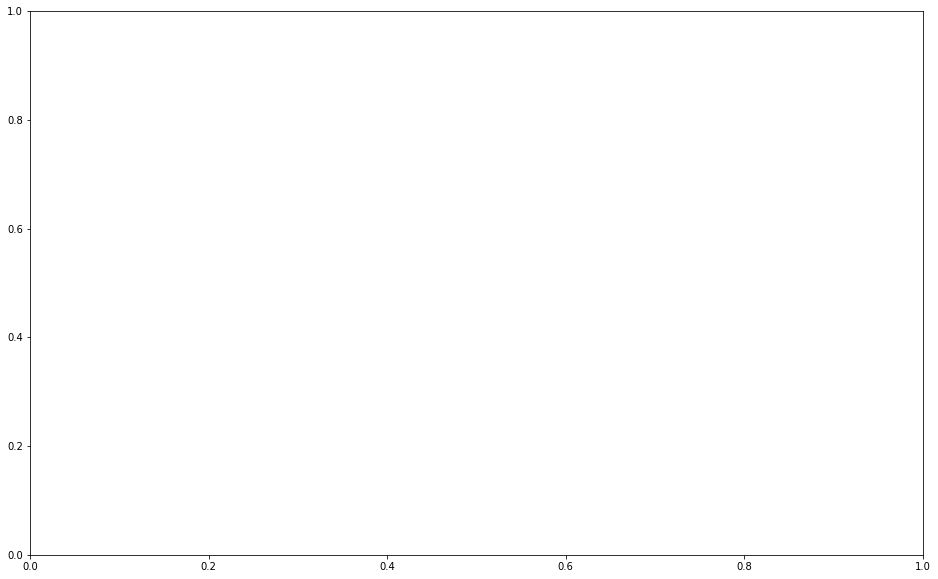

In [25]:
stacked_power_generation(model.results, legend=True)

/Users/zuck016/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/zuck016/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/Users/zuck016/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


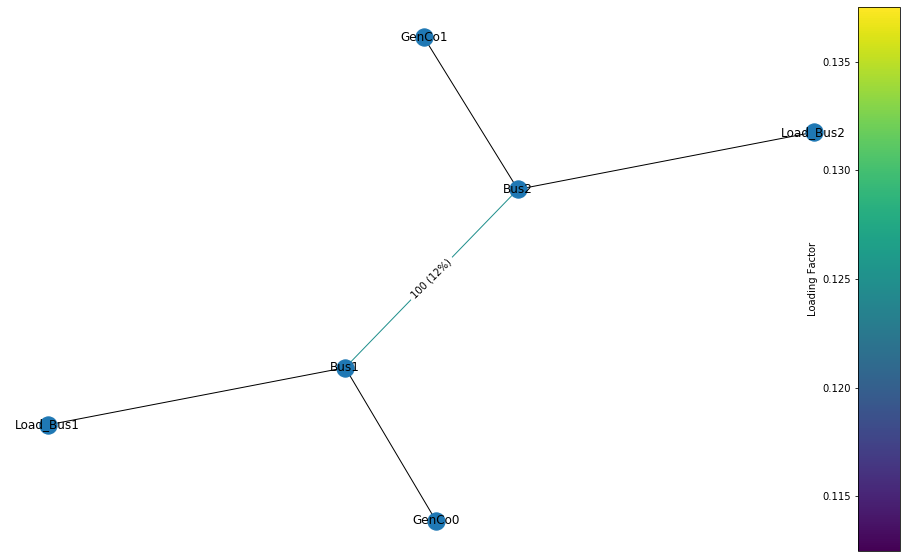

In [27]:
line_power(network, model.results, hour=0)